# Exploratory Analysis Plus


In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# (Optional) Suppress FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [53]:
df = pd.read_csv('employee_data.csv')
print(df.shape)
df.head()

(14249, 10)


,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


Do any of the data types look suspicious/possibly incorrect (i.e. numeric features that should be categorical or vice-versa)? If so, just keep it in the back of your mind. If a **data dictionary** was provided, that's a great resource to doublecheck. Also, it's fine if you're unsure about some columns, as we'll continue to explore them.

In [7]:
# display the last 10 rows of data to check for any signs of corrupted data
df.tail(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
14239,242,finance,NaN,0.781112,6,NaN,low,0.669866,Left,5.0
14240,131,engineering,NaN,0.531197,2,NaN,low,0.341842,Left,3.0
14241,235,IT,NaN,0.683498,3,NaN,medium,0.923564,Employed,3.0
14242,157,support,NaN,0.707167,5,NaN,low,0.834708,Employed,4.0
14243,272,engineering,NaN,0.815504,4,NaN,low,0.693387,Employed,2.0
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0
14248,159,NaN,NaN,0.578742,3,NaN,medium,0.808850,Employed,3.0


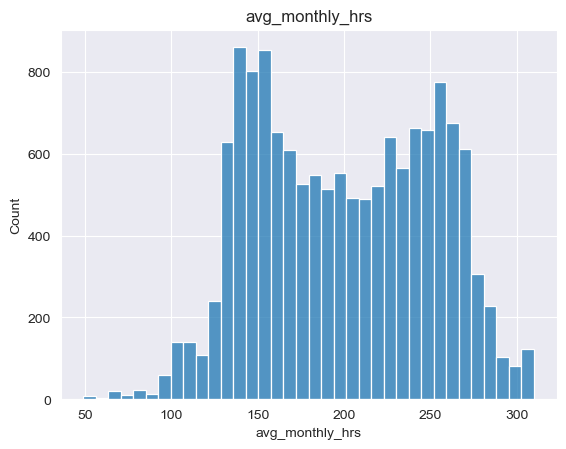

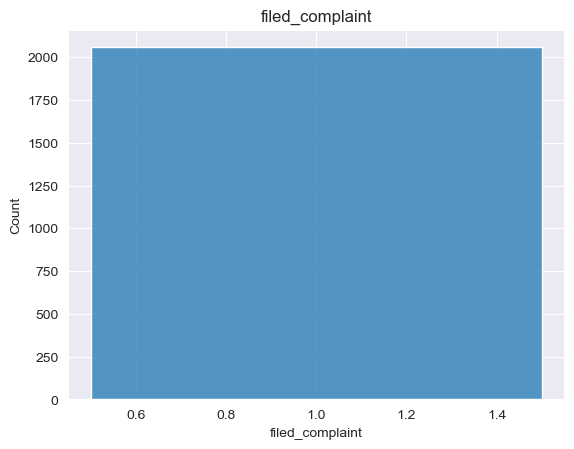

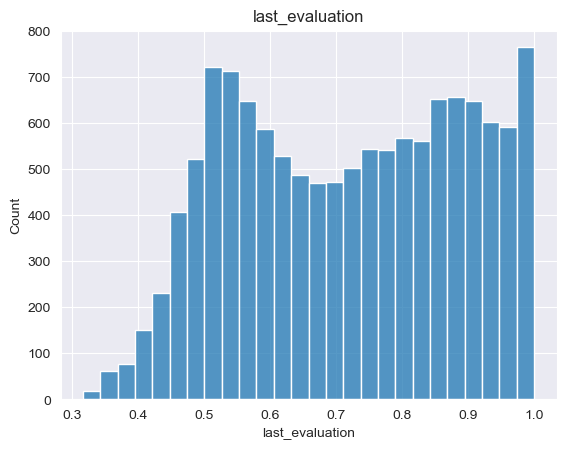

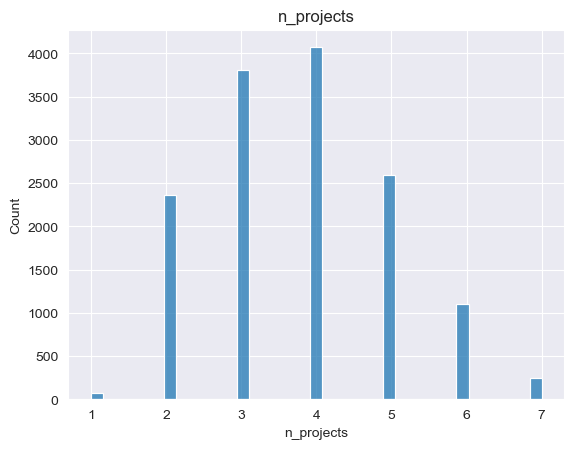

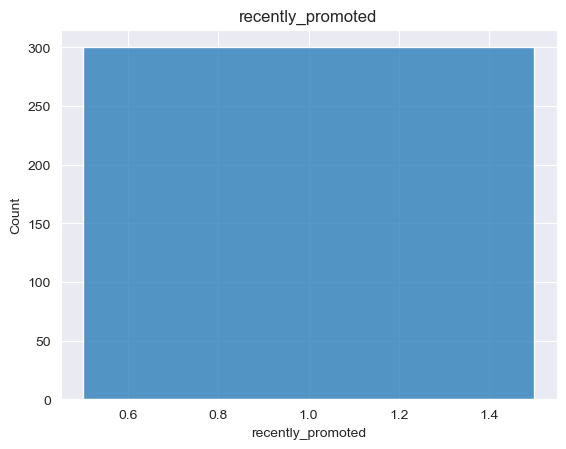

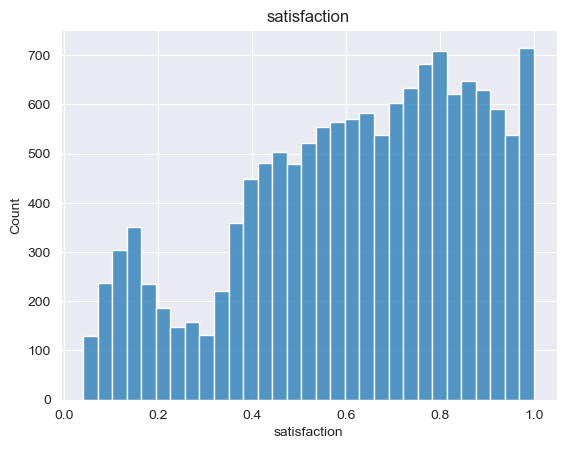

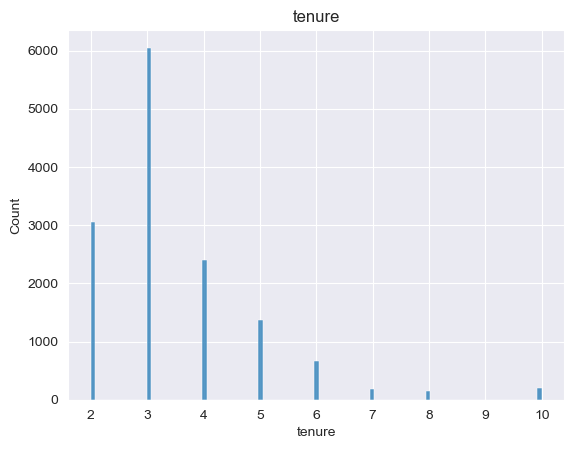

In [11]:
for v in df.select_dtypes(exclude='object'):
    sns.histplot(df[v])
    plt.title(v)
    plt.show()

#### Consider these questions:
* Are there any distributions that don't make sense?
* Does it look like there are potential **outliers** that don't make sense?
* Are there any **boundaries** that don't make sense?

In [17]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


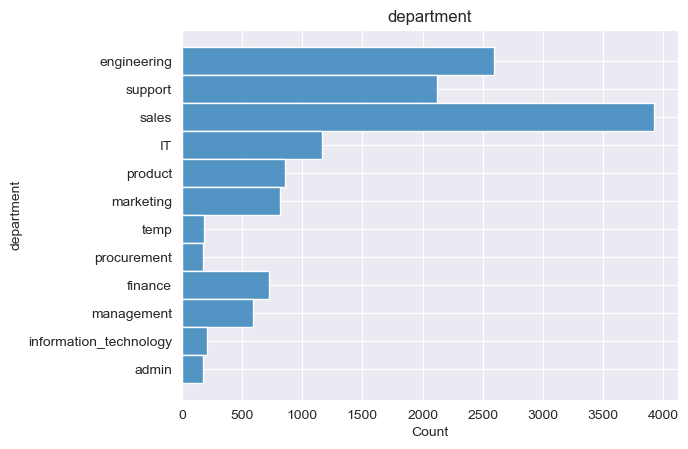

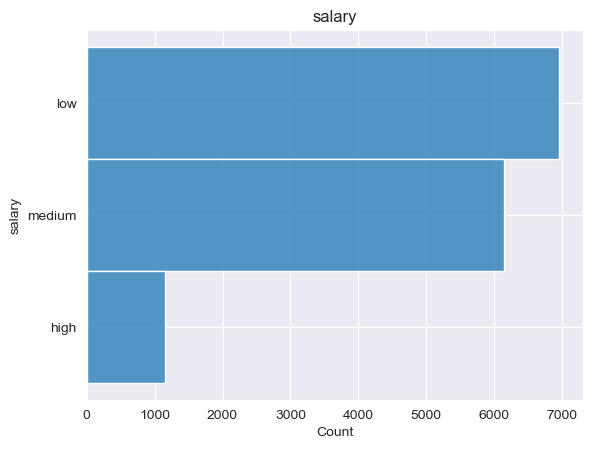

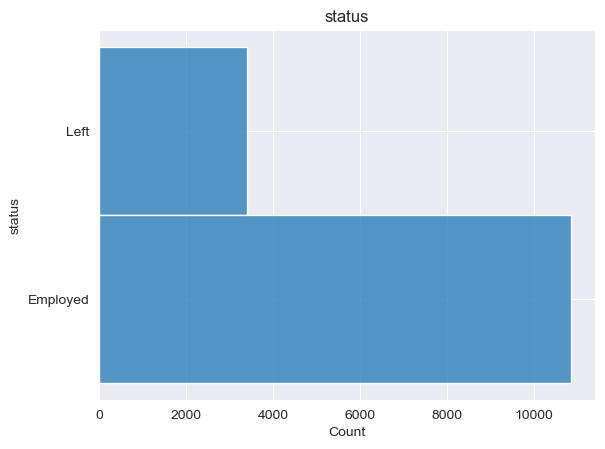

In [14]:
for v in df.select_dtypes(include='object'):
    sns.histplot(y=df[v])
    plt.title(v)
    plt.show()

In [19]:
df.describe(include=['object'])

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


####  For each categorical feature, consider:
* How many **unique** classes does it have?
* What is the most frequent class?
* How many observations belong to the most frequent class?
* Does it have any missing values?

You should be able to answer each of those questions from the summary statistics table!

####  Finally, consider:
* Are there any classes that might be **sparse**?
* Are there any classes that shouldn't be in the dataset based on our **project scope**? (Hint: there's 1... can you find it?)
* Are there any **mislabeled classes** (i.e. two classes that are essentially the same)?
* Do the distributions seem intuitive?


## II. Advanced Segmentations

For classification tasks, your target variable is categorical. Therefore, we recommend segmenting key numeric features by the target variable. (In the previous project, we recommended segmenting the target variable by key categorical features.)

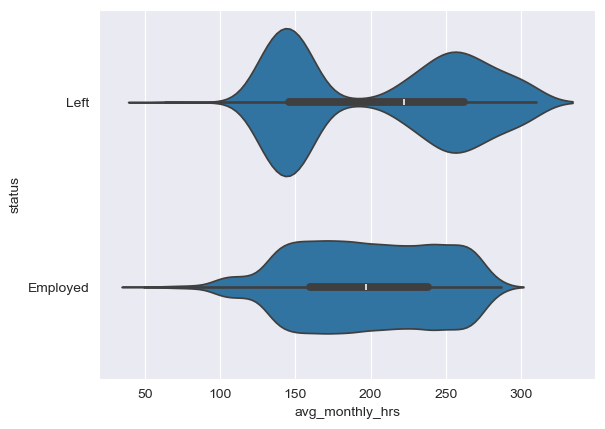

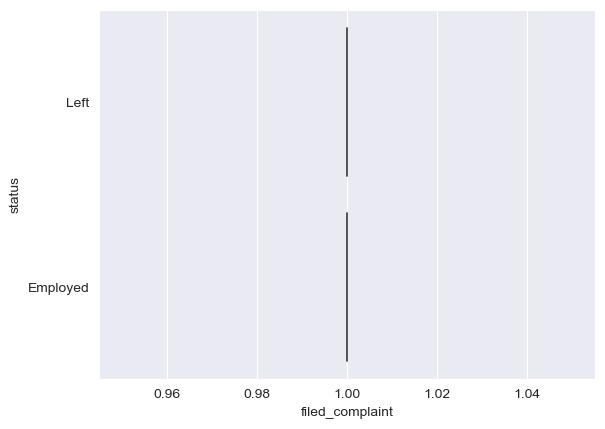

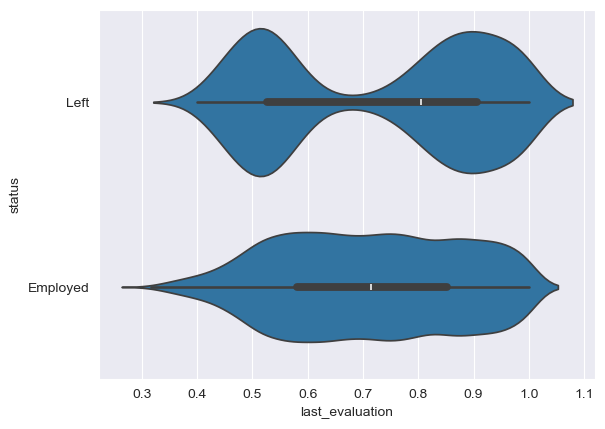

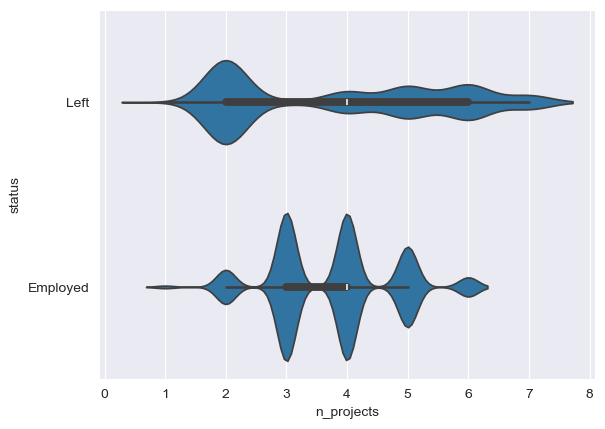

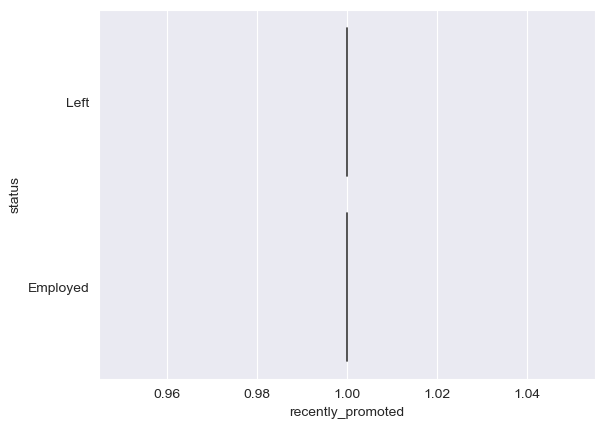

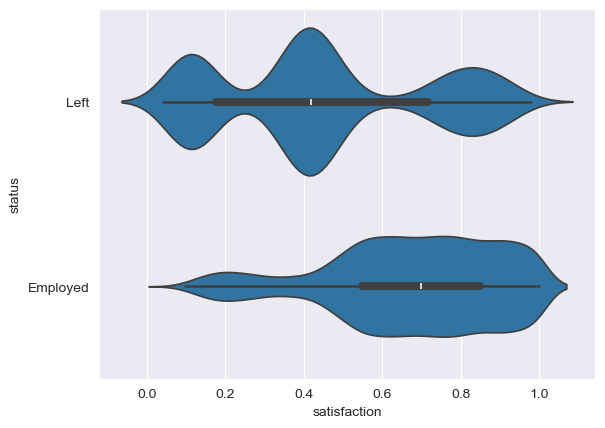

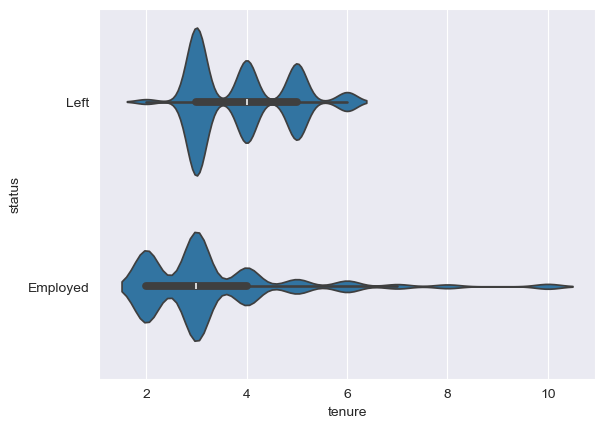

In [29]:
# Segment satisfaction by status and plot distributions
for v in df.select_dtypes(exclude='object'):
    sns.violinplot(y='status', x=v, data=df)
    plt.show()

In [37]:
df.groupby(['status']).mean(numeric_only =True)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
status,,,,,,,
Employed,197.700286,1.0,0.714479,3.755273,1.0,0.675979,3.380245
Left,206.502948,1.0,0.730706,3.833137,1.0,0.447500,3.869023


Now you can compare all of the numeric features between employees who've left and those who are still employed.

#### D.) Finally, answer these questions.
* Did leavers work more hours per month?
* On average, were leavers longer tenured?
* On average, did leavers have lower evaluations than those who are still employed?
* What percent of leavers filed a complaint? How about those who are still employed?
* What percent of leavers were recently promoted? How about those who are still employed?

## III. Ad-Hoc Data Cleaning

In [55]:
df['filed_complaint']=df['filed_complaint'].fillna(0)
df['recently_promoted']=df['recently_promoted'].fillna(0)
df.groupby(['status']).mean(numeric_only =True)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
status,,,,,,,
Employed,197.700286,0.175187,0.714479,3.755273,0.025974,0.675979,3.380245
Left,206.502948,0.045991,0.730706,3.833137,0.005307,0.447500,3.869023


## IV. Ad-Hoc Feature Engineering

In [57]:
df['department']=df['department'].replace('information_technology', 'IT')

In [61]:
df.drop(df[df['department']=='temp'].index, inplace=True)

<Axes: xlabel='Count', ylabel='department'>

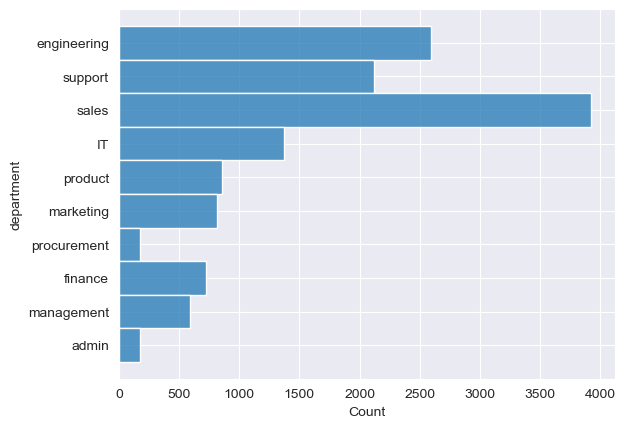

In [63]:
sns.histplot(y=df['department'])

#### determine which department had the employees who worked the most monthly hours on average.
* **Tip:** Just as in many of the exercises, there are multiple valid ways to arrive at this answer.

In [74]:
df.groupby('department').mean(numeric_only=True).sort_values(by='avg_monthly_hrs')

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
department,,,,,,,
procurement,199.482759,0.183908,0.699205,3.885057,0.057471,0.627930,3.264368
marketing,199.664225,0.159951,0.715018,3.687424,0.048840,0.629122,3.567766
product,199.991860,0.151163,0.719616,3.817442,0.000000,0.628774,3.487209
sales,200.842467,0.141728,0.711254,3.772878,0.024726,0.623075,3.527148
support,200.975495,0.155042,0.723200,3.804430,0.008483,0.626923,3.394910
management,201.025210,0.173109,0.729714,3.857143,0.114286,0.630428,4.294118
finance,201.175824,0.119505,0.723880,3.815934,0.019231,0.586787,3.543956
admin,201.272727,0.096591,0.726282,3.897727,0.028409,0.611450,3.369318
IT,202.174453,0.140876,0.720017,3.810219,0.005109,0.628079,3.456204


<Axes: xlabel='Count', ylabel='department'>

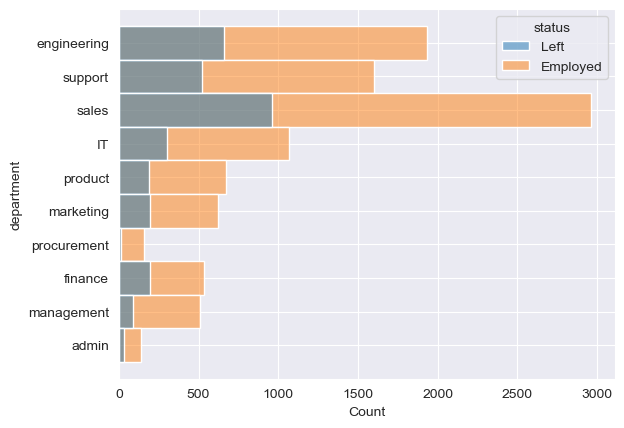

In [84]:
sns.histplot(y='department',hue='status',data=df)

## Advanced Segmentations</span>

In the Coding Section, we saw a bivariate segmentation for <code style="color:steelblue">'satisfaction'</code> and <code style="color:steelblue">'last_evaluation'</code>. Now, let's take a quick look at segmentations of other combinations of features.

#### A.) Plot a bivariate segmentation for <code style="color:steelblue">'last_evaluation'</code> and <code style="color:steelblue">'avg_monthly_hrs'</code> segmented by <code style="color:steelblue">'status'</code>.
* What is this chart telling us?

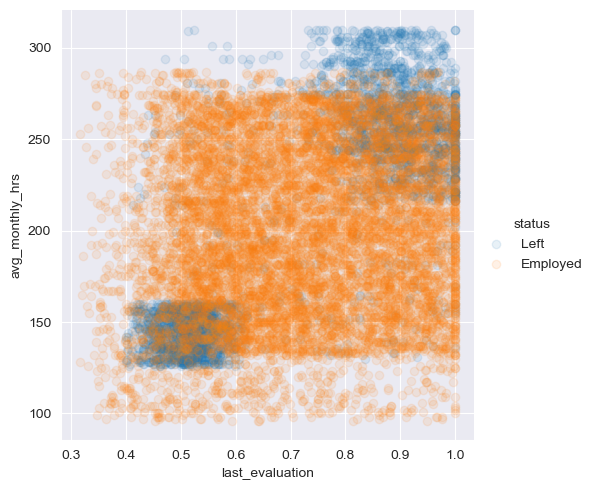

In [90]:
sns.lmplot(x='last_evaluation',y='avg_monthly_hrs', hue='status', data=df, fit_reg=False,
           scatter_kws={'alpha':0.1})

#### B.) Plot another scatterplot of <code style="color:steelblue">'last_evaluation'</code> and <code style="color:steelblue">'avg_monthly_hrs'</code>, but only for employees who have <code style="color:crimson">'Left'</code>.
* Note that we don't need the <code style="color:steelblue">hue=</code> argument.
* Instead, we can filter the <code style="color:steelblue">data=df</code> argument.

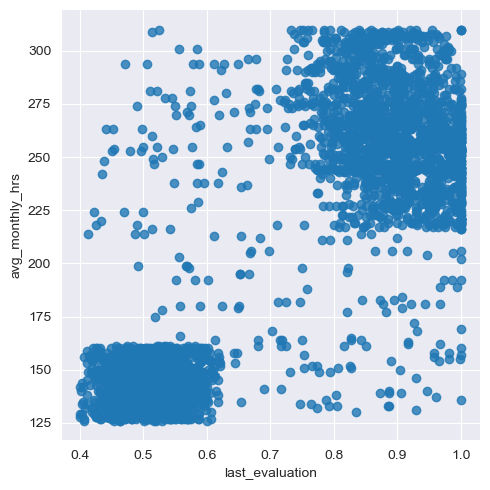

In [92]:
# Scatterplot of last_evaluation vs. avg_monthly_hrs for leavers
sns.lmplot(x='last_evaluation', y='avg_monthly_hrs', data=df[df.status=='Left'], fit_reg=False)
plt.show()

#### Does it look like there are clusters of people who left based on these two features? Could we create any new features during feature engineering based on this information?
* Again, not all of the features we engineer will need to be winners. As long as we have good reasoning to try them, we can put them in and leave it up to our model training process to perform feature selection.